# Statistics & Public Health 2: Data Analysis

### Author: Jason Lew

### Date: 2/26/2024

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
%matplotlib inline

import statsmodels.api as sm

#### Import Dataset

In [2]:
df = pd.read_csv('mosquito_data_part_2.csv')
df.head()

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.977738,-87.880969,9
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.798211,-87.736925,9
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.987245,-87.689417,9
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.953664,-87.724987,9
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,negative,CULEX RESTUANS,41.657069,-87.546049,9


### Part 1 - Basic Analysis

#### Question 1 - Convert the WNV Present column into a binary column and create dummy variables from the Trap type column.

In [3]:
# Use the 'map' function to convert 'WNV Present' column into binary column
df['WNV_Binary'] = df['WNV Present'].map({'negative': 0, 'positive': 1})

In [4]:
# Check to see if new column was created
df.head()

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month,WNV_Binary
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.977738,-87.880969,9,0
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.798211,-87.736925,9,0
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.987245,-87.689417,9,0
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.953664,-87.724987,9,0
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,negative,CULEX RESTUANS,41.657069,-87.546049,9,0


In [5]:
# Use the 'get_dummies' function to create dummy variables for the 'Trap type' column
trap_dummies = pd.get_dummies(df['Trap type'], prefix='Trap')

In [6]:
# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df, trap_dummies], axis=1)

In [7]:
# Check and see if new columns were created
df.head()

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month,WNV_Binary,Trap_CDC,Trap_GRAVID,Trap_OVI,Trap_SENTINEL
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.977738,-87.880969,9,0,False,True,False,False
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.798211,-87.736925,9,0,False,True,False,False
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.987245,-87.689417,9,0,False,True,False,False
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.953664,-87.724987,9,0,False,True,False,False
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,negative,CULEX RESTUANS,41.657069,-87.546049,9,0,False,True,False,False


In [8]:
# Drop original columns
df = df.drop(['WNV Present', 'Trap type'], axis=1)

In [9]:
# Check if columns were dropped
df.head()

,Year,Week,Address Block,Trap,Date,Mosquito number,Species,Lat,Lon,Month,WNV_Binary,Trap_CDC,Trap_GRAVID,Trap_OVI,Trap_SENTINEL
0,2019,39,100XX W OHARE AIRPORT,T910,2019-09-26 00:09:00,2,CULEX RESTUANS,41.977738,-87.880969,9,0,False,True,False,False
1,2019,39,52XX S KOLMAR AVE,T114,2019-09-26 00:09:00,1,CULEX RESTUANS,41.798211,-87.736925,9,0,False,True,False,False
2,2019,39,58XX N WESTERN AVE,T028,2019-09-26 00:09:00,2,CULEX RESTUANS,41.987245,-87.689417,9,0,False,True,False,False
3,2019,39,39XX N SPRINGFIELD AVE,T228,2019-09-26 00:09:00,1,CULEX RESTUANS,41.953664,-87.724987,9,0,False,True,False,False
4,2019,39,131XX S BRANDON AVE,T209,2019-09-26 00:09:00,9,CULEX RESTUANS,41.657069,-87.546049,9,0,False,True,False,False


#### Question 2 - What is the average number of mosquitoes for each month? What trends do you notice?

In [10]:
# Make sure date column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
# Check to see if converted to datetime format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Year             18495 non-null  int64         
 1   Week             18495 non-null  int64         
 2   Address Block    18495 non-null  object        
 3   Trap             18495 non-null  object        
 4   Date             18495 non-null  datetime64[ns]
 5   Mosquito number  18495 non-null  int64         
 6   Species          18495 non-null  object        
 7   Lat              18495 non-null  float64       
 8   Lon              18495 non-null  float64       
 9   Month            18495 non-null  int64         
 10  WNV_Binary       18495 non-null  int64         
 11  Trap_CDC         18495 non-null  bool          
 12  Trap_GRAVID      18495 non-null  bool          
 13  Trap_OVI         18495 non-null  bool          
 14  Trap_SENTINEL    18495 non-null  bool 

In [12]:
# Group by month and calculate the average number of mosquitoes for each month
avg_mosquitoes_per_month = df.groupby('Month')['Mosquito number'].mean()
avg_mosquitoes_per_month

Month
5      2.761905
6     10.264442
7     11.551879
8     12.111321
9      8.394973
10     5.377778
Name: Mosquito number, dtype: float64

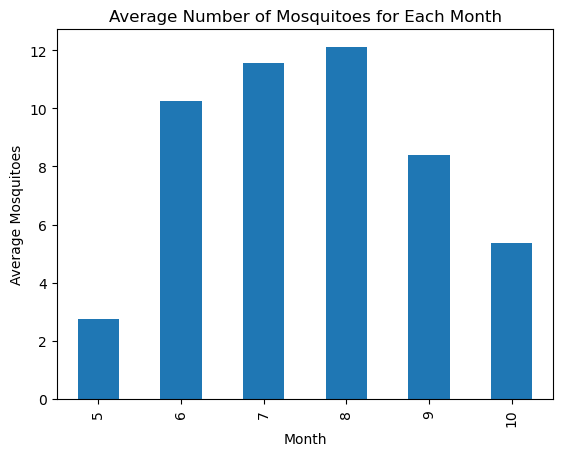

In [13]:
# Plot the data to analyze trends

avg_mosquitoes_per_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Average Mosquitoes')
plt.title('Average Number of Mosquitoes for Each Month')
plt.show()

# The month with the most average number of mosquitoes was Month 8(August), and the month with the least was Month 5(May).
# Average number of mosquitoes starts low at month 5 with 3 and gradual increases to a peak at month 8 with 12
# After month 8 the model regresses and the average number of mosquitoes decreases for each following month

### Part 2 - Statistical Analysis

#### Question 1 - Is there a statistically significant difference between the different mosquito species when looking at the occurrence of West Nile Virus?

In [14]:
# Create a contingency table
contingency_table = pd.crosstab(df['Species'], df['WNV_Binary'])
contingency_table

WNV_Binary,0,1
Species,,
CULEX PIPIENS,4074,1412
CULEX RESTUANS,9309,2557
CULEX SALINARIUS,215,11
CULEX TERRITANS,903,14


In [15]:
# Use Chi-Square Test
from scipy.stats import chi2_contingency
chi2, p, _, _ = chi2_contingency(contingency_table)
print (p)

3.9302341764409087e-67


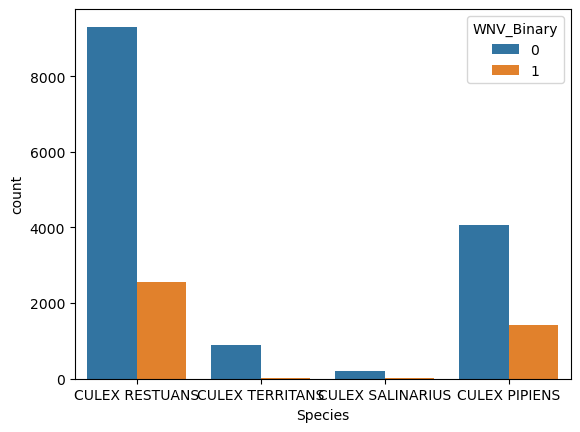

In [16]:
# Visualize the data

sns.countplot(x='Species', hue='WNV_Binary', data=df)
plt.show()

#### Based on the visualized data and the p value being less than the 0.05 threshold we can conclude that there is a statistically significant difference between mosquito species and West Nile Virus Present

#### Question 2 - Which columns are positively correlated with the number of mosquitoes caught? Which columns are negatively correlated? Are these correlations statistically significant?

In [17]:
# Calculate correlations
correlations = df.corr(numeric_only=True)['Mosquito number']
correlations

Year               0.129326
Week              -0.033900
Mosquito number    1.000000
Lat                0.096820
Lon               -0.151421
Month             -0.040426
WNV_Binary         0.408034
Trap_CDC           0.094147
Trap_GRAVID       -0.138275
Trap_OVI          -0.005392
Trap_SENTINEL      0.108575
Name: Mosquito number, dtype: float64

In [18]:
# Identify positively and negatively correalted columns
positively_correlated = correlations[correlations > 0].index
negatively_correlated = correlations[correlations < 0].index
print (positively_correlated)
print (negatively_correlated)
# Positively correlated columns are: Year, Mosquito number, Last, WNV_Binary, Trap_CDC, and Trap_Sentinel
# Negatively correlated columns are: Week, Lon, Month, Trap_Gravid, and Trap_OVI

Index(['Year', 'Mosquito number', 'Lat', 'WNV_Binary', 'Trap_CDC',
       'Trap_SENTINEL'],
      dtype='object')
Index(['Week', 'Lon', 'Month', 'Trap_GRAVID', 'Trap_OVI'], dtype='object')


In [19]:
# Test statistical significance using 'pearsonr' function
for column in positively_correlated:
    corr_coefficient, p_value = pearsonr(df[column], df['Mosquito number'])
    print(f"{column}: Correlation = {corr_coefficient}, p-value = {p_value}")

Year: Correlation = 0.12932594549371046, p-value = 8.39305001670708e-70
Mosquito number: Correlation = 1.0, p-value = 0.0
Lat: Correlation = 0.09681989674648904, p-value = 9.096861337941079e-40
WNV_Binary: Correlation = 0.4080343968902988, p-value = 0.0
Trap_CDC: Correlation = 0.09414701564247448, p-value = 1.0952570288059922e-37
Trap_SENTINEL: Correlation = 0.10857486046661546, p-value = 1.289396369672207e-49


In [20]:
for column in negatively_correlated:
    corr_coefficient, p_value = pearsonr(df[column], df['Mosquito number'])
    print(f"{column}: Correlation = {corr_coefficient}, p-value = {p_value}")

Week: Correlation = -0.033899607544960825, p-value = 4.002824803746224e-06
Lon: Correlation = -0.15142112596890905, p-value = 2.765603982232105e-95
Month: Correlation = -0.0404264371966008, p-value = 3.803875521130299e-08
Trap_GRAVID: Correlation = -0.1382747912769916, p-value = 1.2678161470845446e-79
Trap_OVI: Correlation = -0.005391611231865274, p-value = 0.4634394584475857


In [21]:
# Every column except Trap_OVI has a p-value below the 0.05 threshold, therefore the correlation is considered statistically significant

### Part 3 - Advanced Statistical Analysis

#### Question 1 - Run a linear regression to determine how the independent variables affect the number of mosquitoes caught. Explain your model construction process. Analyze the model and the results and discuss the model’s limitations. This may end up being an iterative process.

In [22]:
# Separate independent from dependent variable
X = df[['Year', 'Week','Month']]
y = df['Mosquito number']

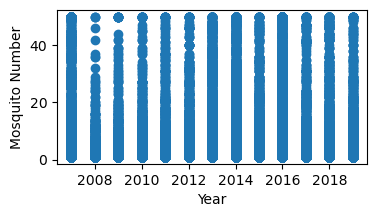

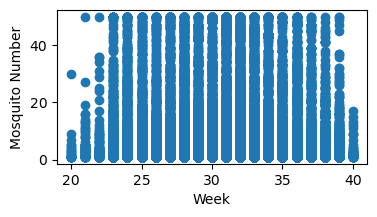

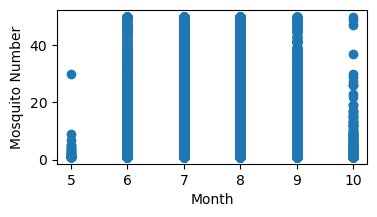

In [23]:
# Create plots
for col in X.columns: 
    plt.figure(figsize=(4,2))
    plt.scatter(X[col], y)
    plt.ylabel('Mosquito Number')
    plt.xlabel(col)
    plt.show()

In [24]:
# Create constant
X_withconstant = sm.add_constant(X)
X_withconstant

,const,Year,Week,Month
0,1.0,2019,39,9
1,1.0,2019,39,9
2,1.0,2019,39,9
3,1.0,2019,39,9
4,1.0,2019,39,9
...,...,...,...,...
18490,1.0,2016,36,9
18491,1.0,2007,34,8
18492,1.0,2016,30,7
18493,1.0,2017,33,8


In [25]:
# 1. Instantiate Model
mosquito_number = sm.OLS(y,X_withconstant)

# 2. Fit Model
mosquito_number_results = mosquito_number.fit()

# Look at the summary
mosquito_number_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     111.2
Date:                Mon, 26 Feb 2024   Prob (F-statistic):           2.42e-71
Time:                        01:17:19   Log-Likelihood:                -74180.
No. Observations:               18495   AIC:                         1.484e+05
Df Residuals:                   18491   BIC:                         1.484e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -934.1185     54.901    -17.015      0.000   -1041.730    -826.507
Year           0.4708      0.027     17.291      0.000       0.417       0.524
Week          -0.1552      0.074     -2.101      0.036      -0.300      -0.010
Month          0.2706      0.322      0.840      0.401      -0.361       0.902
==============================================================================
Omnibus:                     5053.221   Durbin-Watson:                   1.516
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10670.167
Skew:                           1.642   Prob(JB):                         0.00
Kurtosis:                       4.750   Cond. No.                     1.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
# R-squared value of 0.018 indicates that the modle explains only a small portion of the variance
# Positive coefficients for Year and Month suggest that for each one-unit increase, the dependent variable also increases
# P-values for all are very low indicating statistical significance

In [27]:
# Reiterated model
X = X = df[['Lat', 'Lon',]]
y = df['Mosquito number']

In [28]:
X_withconstant = sm.add_constant(X)
X_withconstant

,const,Lat,Lon
0,1.0,41.977738,-87.880969
1,1.0,41.798211,-87.736925
2,1.0,41.987245,-87.689417
3,1.0,41.953664,-87.724987
4,1.0,41.657069,-87.546049
...,...,...,...
18490,1.0,41.857843,-87.635858
18491,1.0,41.965376,-87.758403
18492,1.0,41.662395,-87.590176
18493,1.0,41.919197,-87.664758


In [29]:
# 1. Instantiate Model
mosquito_number = sm.OLS(y,X_withconstant)

# 2. Fit Model
mosquito_number_results = mosquito_number.fit()

# Look at the summary
mosquito_number_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     223.1
Date:                Mon, 26 Feb 2024   Prob (F-statistic):           1.81e-96
Time:                        01:17:19   Log-Likelihood:                -74125.
No. Observations:               18495   AIC:                         1.483e+05
Df Residuals:                   18492   BIC:                         1.483e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2032.0394    102.141    -19.894      0.000   -2232.246   -1831.833
Lat           -4.4362      1.281     -3.462      0.001      -6.948      -1.925
Lon          -25.4078      1.550    -16.391      0.000     -28.446     -22.370
==============================================================================
Omnibus:                     5027.682   Durbin-Watson:                   1.494
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10597.374
Skew:                           1.633   Prob(JB):                         0.00
Kurtosis:                       4.756   Cond. No.                     1.01e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
# R-squared value of 0.024 indicates the model explain a small portion of the variance in the dependent variable
# P-values are very low indicating statistical significance
# Negative coefficient values for 'Lat' and 'Lon' suggest negative relationship between these variables and the number of mosquitoes caught

#### Question 2 - Run a logistic regression to determine how the independent variables affect West Nile Virus presence. Explain your model construction process. Analyze the model and the results and discuss the model’s limitations. This may end up being an iterative process.

In [55]:
# Wanted to use 'Species' as an X variable but kept getting ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).
# If you could include solution to this error in write up would be greatly appreciated

In [38]:
# Separate data into dependent and independent variables
X = df[['Year', 'Week', 'Month']]
y = df['WNV_Binary']

In [39]:
# Manually add intercept
X_withconstant = sm.add_constant(X)
X_withconstant.head()

,const,Year,Week,Month
0,1.0,2019,39,9
1,1.0,2019,39,9
2,1.0,2019,39,9
3,1.0,2019,39,9
4,1.0,2019,39,9


In [40]:
# 1. Instantiate model
mylogreg = sm.Logit(y, X_withconstant)

#2. Fit the model
mylogreg_results = mylogreg.fit()

# Summarize
mylogreg_results.summary()

Optimization terminated successfully.
         Current function value: 0.492520
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             WNV_Binary   No. Observations:                18495
Model:                          Logit   Df Residuals:                    18491
Method:                           MLE   Df Model:                            3
Date:                Mon, 26 Feb 2024   Pseudo R-squ.:                 0.05599
Time:                        01:22:39   Log-Likelihood:                -9109.2
converged:                       True   LL-Null:                       -9649.5
Covariance Type:            nonrobust   LLR p-value:                5.775e-234
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -237.8296     10.657    -22.317      0.000    -258.717    -216.942
Year           0.1157      0.005     21.916      0.000       0.105       0.126
Week           0.0616      0.014      4.369      0.000       0.034       0.089
Month          0.2136      0.061      3.481      0.000       0.093       0.334
==============================================================================
"""

In [ ]:
# Psuedo R-squared values indicates thatthe model explain approximately 5.6% of the variability inthe binary outcome variable
# The coefficients are statistically significant suggesting that the independent variables have a significant impact on West Nile Virus presences
# P-values are low indicating statistical significance
# Low Pseudo R-squared is relatively low, suggesting there are other more related factors that influence West Nile Virus Presence

In [52]:
# Reiterated model
X = df[['Lat', 'Lon']]
y = df['WNV_Binary']

In [53]:
# Manually add intercept
X_withconstant = sm.add_constant(X)
X_withconstant.head()

,const,Lat,Lon
0,1.0,41.977738,-87.880969
1,1.0,41.798211,-87.736925
2,1.0,41.987245,-87.689417
3,1.0,41.953664,-87.724987
4,1.0,41.657069,-87.546049


In [54]:
# 1. Instantiate model
mylogreg = sm.Logit(y, X_withconstant)

#2. Fit the model
mylogreg_results = mylogreg.fit()

# Summarize
mylogreg_results.summary()

Optimization terminated successfully.
         Current function value: 0.508216
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             WNV_Binary   No. Observations:                18495
Model:                          Logit   Df Residuals:                    18492
Method:                           MLE   Df Model:                            2
Date:                Mon, 26 Feb 2024   Pseudo R-squ.:                 0.02591
Time:                        01:35:17   Log-Likelihood:                -9399.5
converged:                       True   LL-Null:                       -9649.5
Covariance Type:            nonrobust   LLR p-value:                2.629e-109
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -386.7928     18.747    -20.632      0.000    -423.536    -350.049
Lat           -0.5434      0.245     -2.222      0.026      -1.023      -0.064
Lon           -4.6538      0.287    -16.218      0.000      -5.216      -4.091
==============================================================================
"""

In [ ]:
# Pseudo R-squared value indicates the model explains approximately 2.6% of the variability
# Coefficients are statistically significant, suggesting that the independnet variables have significant impact on the log-odds of West Nile Virus presences
# Model doesnt explain much as indicated by low Presudo R-squared value, may be better unaccounted factors
# Model does not provide insights into causation and only identifies associations